In [1]:
import numpy as np
import torch
import kernel_flow

def Henon(T, dt, N_sims,a,b):
    N_t  = int(T//dt)
    sims = np.zeros((N_sims, N_t, 2))
    for i in range(1,N_t):
        sims[:, i] = np.array([1-a*sims[:,i-1,0]**2+sims[:,i-1,1],b*sims[:,i-1,0]]).T
    return sims.astype(np.float32)

def prepare_data(data_x,delay, normalize):
    lenX=data_x.shape[1]
    num_modes = data_x.shape[0]
    
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
            X[i,(mode*delay):(mode*delay+delay)]=data_x[mode,i:(i+delay)]
            Y[i,(mode*delay):(mode*delay+delay)]=data_x[mode,(i+delay):(i+2*delay)]
    
            
    # Normalize
    X=X/normalize
    Y=Y/normalize
    return X, Y

# generate dataset
Data = Henon(T=200, dt=0.1,N_sims=1,a=1.4,b=0.3)[0]
#train test split
observed_data= Data[0::2]
train_data = Data[:600,:].T
test_data = Data[600:,:].T
#times
Times = np.linspace(1,2000-1,2000-1)

# Some constants
nparameters=24
delay = 1
regu_lambda = 0.00001

# Get scaling factor
normalize=np.amax(train_data[:,:])

X_train, Y_train = prepare_data(train_data,delay,normalize)
X_test, Y_test = prepare_data(test_data,delay,normalize)


model = kernel_flow.KernelFlows("anl3",nparameters= 24, regu_lambda=regu_lambda)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

model.set_training_data(torch.Tensor(X_train).double(),torch.Tensor(Y_train).double())

for i in range(1000):
    optimizer.zero_grad()
    rho = model.forward()
    if rho>=0 and rho<=1:
        rho.backward()
        optimizer.step()
        print(rho)

print(model.kernel_params)

tensor(0.5622, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.7805, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.2017, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0567, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.5379, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.9276, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.8465, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0364, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0301, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.1183, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0217, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.1173, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0500, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0460, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0739, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0512, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0343, dtype=tor

tensor(0.0150, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0121, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0303, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0216, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0242, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0102, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0301, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0236, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0230, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0114, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0060, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0407, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0411, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0306, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0187, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0187, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0144, dtype=tor

tensor(0.0057, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0075, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0110, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0068, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0066, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0069, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0185, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0075, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0063, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0132, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0052, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0252, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0183, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0052, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0137, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0184, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0308, dtype=tor

tensor(0.0079, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0075, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0121, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0061, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0043, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0045, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0075, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0110, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0123, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0128, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0097, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0045, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0028, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0078, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0033, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0051, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0062, dtype=tor

tensor(0.0216, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0069, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0087, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0053, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0051, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0025, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0036, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0050, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0088, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0019, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0207, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0109, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0062, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0026, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0142, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0175, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0092, dtype=tor

tensor(0.0056, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0033, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0064, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0036, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0083, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0086, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0018, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0048, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0039, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0033, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0040, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0047, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0030, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0041, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0081, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0054, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0058, dtype=tor

tensor(0.0025, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0070, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0037, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0094, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0019, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0040, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0018, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0083, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0042, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0013, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0012, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0030, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0029, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0019, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0068, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0038, dtype=torch.float64, grad_fn=<RsubBackward1>)
tensor(0.0036, dtype=tor

In [2]:
model.compute_kernel_and_inverse(regu_lambda = regu_lambda)
Y_pred = model.predict(torch.Tensor(X_test).double())

In [3]:
Y_pred

tensor([[ 0.3845, -0.1843],
        [ 0.3388,  0.1153],
        [ 0.6973,  0.1017],
        ...,
        [ 0.9685, -0.0066],
        [-0.8903,  0.2906],
        [-0.3344, -0.2671]], dtype=torch.float64, grad_fn=<MmBackward>)

In [4]:
(Y_pred.detach()-Y_test).pow(2).mean()

tensor(3.0410e-12, dtype=torch.float64)

Text(0, 0.5, 'y')

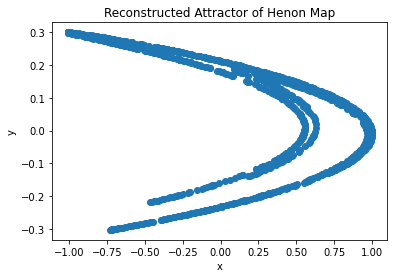

In [5]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred[:,0].detach(),Y_pred[:,1].detach())
plt.title("Reconstructed Attractor of Henon Map")
plt.xlabel("x")
plt.ylabel("y")